In [2]:
import numpy as np 
import pandas as pd 

train_dset_df = pd.read_csv("./datasets/train.csv")
test_dset_df  = pd.read_csv("./datasets/test.csv")

preprocessing_df = pd.read_csv("./2020_11_19_categories.csv")
imputation_df = pd.read_csv("./2020_11_19_imputation_list.csv")

preprocessing_df.set_index("feature_name", inplace=True)


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/akb/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
import gc

## Dropping columns

In [4]:
for column in preprocessing_df.index:
    if(preprocessing_df.loc[column, "drop"] == 1):
        train_dset_df.drop(axis="columns", inplace=True, labels=[column])
        test_dset_df.drop(axis="columns", inplace=True, labels=[column])

## Imputing null values

In [5]:
for i in range(len(imputation_df)):
    try:
        imputation_df["value_to_fill"][i] = int(imputation_df["value_to_fill"][i])
    except:
        print("Whoops!")

Whoops!
Whoops!
Whoops!
Whoops!


In [6]:
imputation_df.set_index("col_name", inplace=True)

In [7]:
for column in imputation_df.index:
    train_dset_df[column].fillna(imputation_df.value_to_fill[column], inplace=True)
    test_dset_df[column].fillna(imputation_df.value_to_fill[column], inplace=True)


## "Custom" preprocessing some columns before one-hot encoding

In [8]:
custom_encode_columns = list(preprocessing_df[preprocessing_df.custom_encode == 1].index)


In [9]:
custom_encode_columns

['SmartScreen',
 'Census_PrimaryDiskTypeName',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical']

### Smartscreen

In [10]:
train_dset_df.SmartScreen.unique()

array(['off', 'RequireAdmin', 'ExistsNotSet', 'Off', 'Warn', 'Prompt',
       'Block', '&#x02;', '&#x01;', 'On', 'on', 'requireadmin', 'prompt',
       'Enabled'], dtype=object)

In [11]:
train_dset_df.SmartScreen = train_dset_df.SmartScreen.apply(lambda x: x.lower())
train_dset_df.SmartScreen[train_dset_df.SmartScreen == "enabled"] = "on"
train_dset_df.SmartScreen[train_dset_df.SmartScreen == '&#x02;'] = "off"
train_dset_df.SmartScreen[train_dset_df.SmartScreen == '&#x01;'] = "off"

/home/akb/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/akb/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/akb/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after remo

In [12]:
test_dset_df.SmartScreen = test_dset_df.SmartScreen.apply(lambda x: x.lower())
test_dset_df.SmartScreen[test_dset_df.SmartScreen == "enabled"] = "on"
test_dset_df.SmartScreen[test_dset_df.SmartScreen == '&#x02;'] = "off"
test_dset_df.SmartScreen[test_dset_df.SmartScreen == '&#x01;'] = "off"

/home/akb/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/akb/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/akb/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after remo

In [13]:
test_dset_df.SmartScreen.unique()

array(['off', 'requireadmin', 'existsnotset', 'warn', 'block', 'prompt',
       'on'], dtype=object)

### Census_PrimaryDiskTypeName

In [14]:
train_dset_df.Census_PrimaryDiskTypeName[train_dset_df.Census_PrimaryDiskTypeName == "Unspecified"] = "UNKNOWN"
test_dset_df.Census_PrimaryDiskTypeName[test_dset_df.Census_PrimaryDiskTypeName == "Unspecified"] = "UNKNOWN"

/home/akb/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/akb/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Census_InternalPrimaryDisplayResolutionHorizontal and Census_InternalPrimaryDisplayResolutionVertical

In [15]:
prod=  list(train_dset_df.Census_InternalPrimaryDisplayResolutionHorizontal.to_numpy() * train_dset_df.Census_InternalPrimaryDisplayResolutionVertical.to_numpy())
quot = list(train_dset_df.Census_InternalPrimaryDisplayResolutionHorizontal.to_numpy()/ train_dset_df.Census_InternalPrimaryDisplayResolutionVertical.to_numpy())
train_dset_df.Census_InternalPrimaryDisplayResolutionHorizontal = prod
train_dset_df.Census_InternalPrimaryDisplayResolutionVertical = quot
train_dset_df.rename(mapper={"Census_InternalPrimaryDisplayResolutionHorizontal": "pixels", "Census_InternalPrimaryDisplayResolutionVertical": "aspect_ratio"}, inplace=True, axis="columns")

In [16]:
prod=  list(test_dset_df.Census_InternalPrimaryDisplayResolutionHorizontal.to_numpy() * test_dset_df.Census_InternalPrimaryDisplayResolutionVertical.to_numpy())
quot = list(test_dset_df.Census_InternalPrimaryDisplayResolutionHorizontal.to_numpy()/ test_dset_df.Census_InternalPrimaryDisplayResolutionVertical.to_numpy())
test_dset_df.Census_InternalPrimaryDisplayResolutionHorizontal = prod
test_dset_df.Census_InternalPrimaryDisplayResolutionVertical = quot
test_dset_df.rename(mapper={"Census_InternalPrimaryDisplayResolutionHorizontal": "pixels", "Census_InternalPrimaryDisplayResolutionVertical": "aspect_ratio"}, inplace=True, axis="columns")

## One-hot encoding

In [17]:
columns_to_one_hot_encode = list(preprocessing_df[preprocessing_df.one_hot_encode == 1].index)

In [18]:
columns_to_one_hot_encode.extend(["Census_PrimaryDiskTypeName", "SmartScreen"])

In [19]:
train_test_dset_df = pd.concat([train_dset_df, test_dset_df], axis=0)

In [20]:
train_test_dset_df = pd.get_dummies(train_test_dset_df, columns=columns_to_one_hot_encode)

In [21]:
train_dset_df = train_test_dset_df[train_test_dset_df.HasDetections.isna() == False]

In [22]:
test_dset_df = train_test_dset_df[train_test_dset_df.HasDetections.isna() == True]

In [23]:
train_X = (train_dset_df.drop(axis="columns", labels="HasDetections")).to_numpy()

In [24]:
train_Y = train_dset_df["HasDetections"].to_numpy()

In [25]:
train_X.shape

(567730, 443)

In [26]:
test_X = test_dset_df.drop(axis="columns", labels="HasDetections").to_numpy()

In [27]:
train_dset_df = None 
train_test_dset_df = None 
test_dset_df = None 

In [28]:
gc.collect()

0

In [29]:
train_X

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [30]:
test_X

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 2., ..., 0., 1., 0.],
       [0., 0., 2., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [31]:
train_Y

array([0., 0., 0., ..., 0., 0., 1.])

In [32]:
columns_to_one_hot_encode

['ProductName',
 'EngineVersion',
 'RtpStateBitfield',
 'Platform',
 'Processor',
 'OsVer',
 'OsSuite',
 'OsPlatformSubRelease',
 'SkuEdition',
 'UacLuaenable',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSEdition',
 'Census_OSInstallTypeName',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing',
 'Wdft_RegionIdentifier',
 'Census_PrimaryDiskTypeName',
 'SmartScreen']

In [33]:
test_X.shape

(243313, 443)

## First models

In [34]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [35]:
def describe(model, X, y):
    yhat = model.predict(X)
    print("ROC AUC SCORE:", roc_auc_score(y, yhat))
    print("F1 SCORE:", f1_score(y, yhat))
    plot_confusion_matrix(model, X, y)
    plt.show()

### SVM : svc = LinearSVC(C=0.1, class_weight={0:1, 1:3.3}, max_iter = 10000)

ROC AUC SCORE: 0.48633781578025986
F1 SCORE: 0.1495086649514332

In [36]:
from sklearn.svm import LinearSVC


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [37]:
# kf = KFold(n_splits=10)
# svc = LinearSVC(C=0.1, class_weight={0:1, 1:3.3}, max_iter = 10000)
# for train_indices, test_indices in kf.split(train_X):
#     train_split_X = train_X[train_indices,:]
#     test_split_X = train_X[test_indices,:]
#     train_split_Y = train_Y[train_indices]
#     test_split_Y = train_Y[test_indices]
#     svc.fit(train_split_X, train_split_Y)
#     print("\n\nTRAINING SCORES:")
#     describe(svc, train_split_X, train_split_Y)

#     print("\nTESTING SCORES:")
#     describe(svc, test_split_X, test_split_Y)

    

### BernoulliNB BernoulliNB(class_prior=(0.7,0.3))
TRAINING SCORES:
ROC AUC SCORE: 0.5837691165963025



In [38]:
from sklearn.naive_bayes import BernoulliNB



TRAINING SCORES:
ROC AUC SCORE: 0.5837691165963025
F1 SCORE: 0.29295369399070886


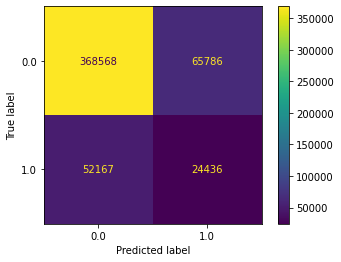


TESTING SCORES:
ROC AUC SCORE: 0.5870481663643042
F1 SCORE: 0.29878869448183043


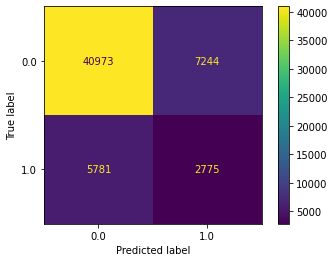



TRAINING SCORES:
ROC AUC SCORE: 0.5842762824590186
F1 SCORE: 0.2940447979803994


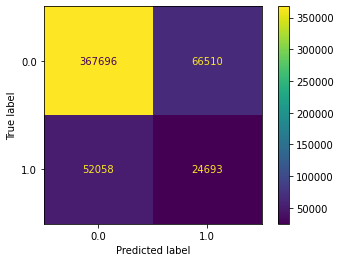


TESTING SCORES:
ROC AUC SCORE: 0.5824130821438587
F1 SCORE: 0.28923839276096086


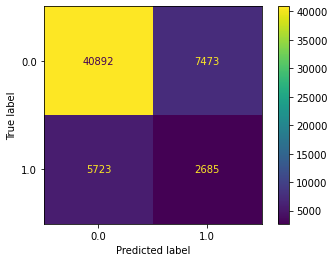



TRAINING SCORES:
ROC AUC SCORE: 0.5842052000012699
F1 SCORE: 0.29395464026593093


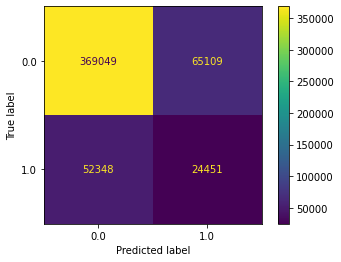


TESTING SCORES:
ROC AUC SCORE: 0.5838795201810736
F1 SCORE: 0.29067481982965715


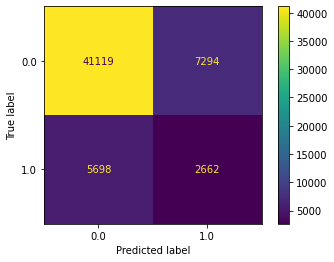



TRAINING SCORES:
ROC AUC SCORE: 0.5835678216528863
F1 SCORE: 0.2923243793515079


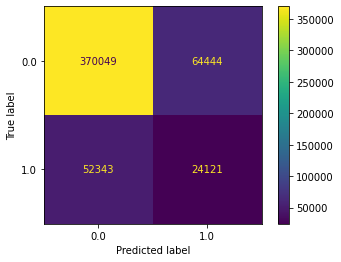


TESTING SCORES:
ROC AUC SCORE: 0.5850638186877701
F1 SCORE: 0.2977149075081611


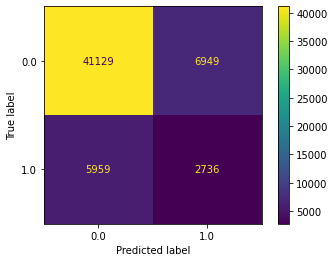



TRAINING SCORES:
ROC AUC SCORE: 0.5840289808320349
F1 SCORE: 0.29356777077228186


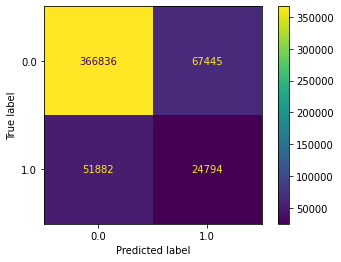


TESTING SCORES:
ROC AUC SCORE: 0.5822506474950314
F1 SCORE: 0.2902416902310196


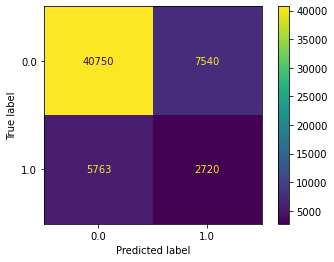



TRAINING SCORES:
ROC AUC SCORE: 0.5845275362232272
F1 SCORE: 0.29417590302857793


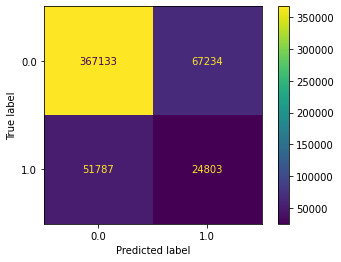


TESTING SCORES:
ROC AUC SCORE: 0.5807098093885985
F1 SCORE: 0.2892232441916104


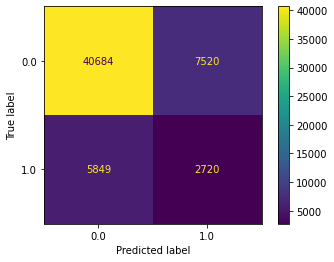



TRAINING SCORES:
ROC AUC SCORE: 0.584249764554602
F1 SCORE: 0.2939224808048558


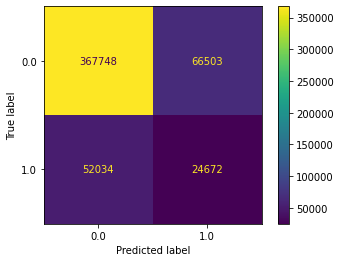


TESTING SCORES:
ROC AUC SCORE: 0.5823648075881991
F1 SCORE: 0.2898597626752967


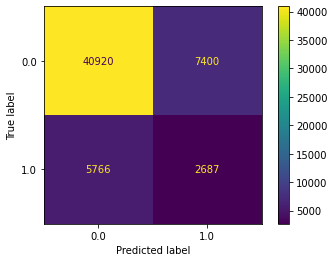



TRAINING SCORES:
ROC AUC SCORE: 0.5835275309434529
F1 SCORE: 0.29247773804094757


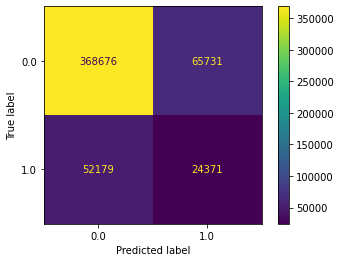


TESTING SCORES:
ROC AUC SCORE: 0.5898183059141575
F1 SCORE: 0.30397273405048464


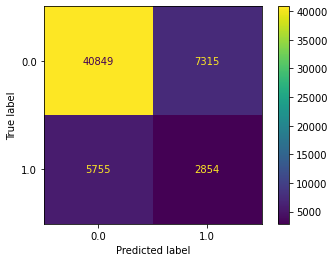



TRAINING SCORES:
ROC AUC SCORE: 0.5845114688021392
F1 SCORE: 0.29421817146112217


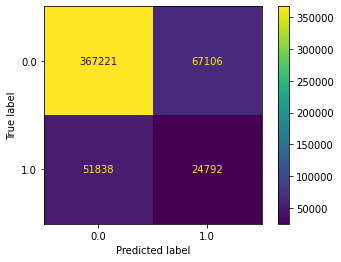


TESTING SCORES:
ROC AUC SCORE: 0.5821539499707146
F1 SCORE: 0.2908062536684275


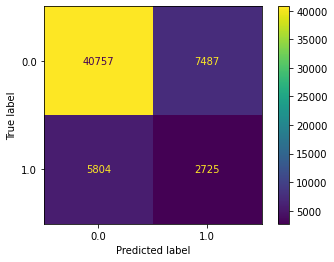



TRAINING SCORES:
ROC AUC SCORE: 0.584854646353695
F1 SCORE: 0.29479380370469477


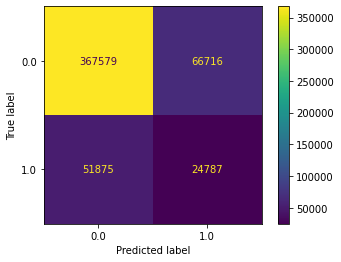


TESTING SCORES:
ROC AUC SCORE: 0.578380489122542
F1 SCORE: 0.28442824991962273


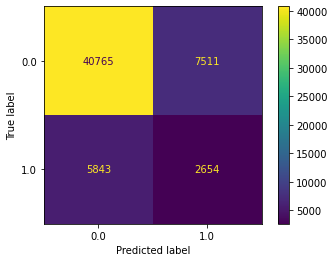

In [42]:
kf = KFold(n_splits=10)
bnb = BernoulliNB(class_prior=(0.7,0.3))
for train_indices, test_indices in kf.split(train_X):
    train_split_X = train_X[train_indices,:]
    test_split_X = train_X[test_indices,:]
    train_split_Y = train_Y[train_indices]
    test_split_Y = train_Y[test_indices]
    bnb.fit(train_split_X, train_split_Y)
    print("\n\nTRAINING SCORES:")
    describe(bnb, train_split_X, train_split_Y)

    print("\nTESTING SCORES:")
    describe(bnb, test_split_X, test_split_Y)    

### Test writing from BernoulliNB

In [43]:
bnb = BernoulliNB(class_prior=(0.7,0.3))
bnb.fit(train_X, train_Y)

BernoulliNB(class_prior=(0.7, 0.3))

In [44]:
test_Yhat = bnb.predict(test_X)

In [45]:
test_Yhat

array([0., 0., 0., ..., 0., 0., 1.])

In [46]:
test_dset_df  = pd.read_csv("./datasets/test.csv")


/home/akb/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
test_dset_df = test_dset_df.loc[:,["MachineIdentifier"]]

In [55]:
test_dset_df["HasDetections"] = np.array(test_Yhat, dtype="int64")

In [59]:
test_dset_df.to_csv("AKB2020_11_19_output.csv", index=False)